# **자연어 6일 - 확률의 문제**
**NLP 문제에서 Machine Learning :** 파이썬 자연어처리 이론과 실습 08장

## **1 확률과 통계**
- 최대확률우도값 (Maximum Liklihood  Extimation) 의 활용
- Sigmoid 함수의 도출 

$$h_\theta(x) = g( \theta^T x) = \frac{1}{1+ e^{-\theta^{T}x}}$$


# **Scikit Learn 데이터를 활용한 모델링**
최대확률우도값 (Maximum Liklihood  Extimation) 의 활용

## **1 Boston 데이터 살펴보기**
Sklearn 의 DataSet 내용의 확인

In [1]:
from sklearn import datasets
boston = datasets.load_boston()
# 필드간의 연관성 판단
boston.target.shape, boston.feature_names

((506,),
 array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'))

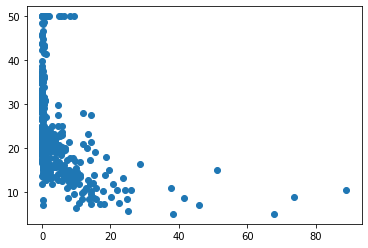

In [2]:
%matplotlib inline
bostonData = boston.data[:,0]  # 특정 필드의 데이터와 선형성 분석하기

import matplotlib.pyplot as plt
plt.scatter(bostonData, boston.target)
plt.show()

## **2 Numpy 를 활용한 선형함수의 계산**
Sklearn 과 Numpy 의 활용

In [3]:
import numpy as np
newData = np.c_[np.ones(len(bostonData)), bostonData]
newData.shape

(506, 2)

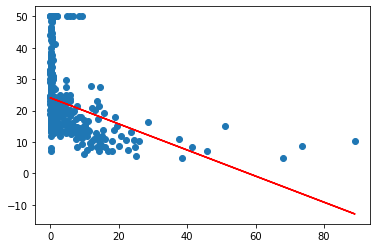

In [4]:
# 셉타^ 을 Numpy 공식으로 구하기
theta = np.linalg.inv(newData.T.dot(newData))\
    .dot(newData.T).dot(boston.target)

plt.scatter(bostonData, boston.target)
plt.plot(bostonData, newData.dot(theta), "r-")
plt.show()

## **3 Multiple, Polynomial Linear Regression**
1. 선형함수는 구현가능한 모델링이 제한적이다.
1. 보다 정확도를 높이기 위한 방시긍로 **차수를 늘려서 theta** 정확도 높이기
1. 즉 **비선형 함수 모델을** 만들어서 보완 합니다

In [5]:
# 다차원 데이터로 변환하기
polyData = np.c_[newData, np.power(bostonData, 2), 
     np.power(bostonData, 3), np.power(bostonData, 4)]
polyData.shape

(506, 5)

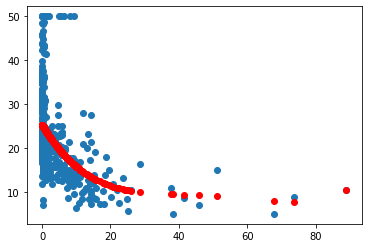

In [6]:
# 추가된 차원 데이터를 활용하여 Theta 구하기 및 시각화
polyTheta = np.linalg.inv(polyData.T.dot(polyData))\
    .dot(polyData.T).dot(boston.target)

plt.scatter(bostonData, boston.target)
plt.plot(bostonData, polyData.dot(polyTheta), "ro")
plt.show()

## **4 분류 모델링에 위 내용 적용하기**
암분류 데이터를 활용하여 분류모델 만들기

In [7]:
# iris = datasets.load_iris()
# iris.target
cancer = datasets.load_breast_cancer()
cancer.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

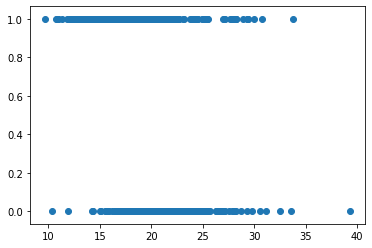

In [9]:
# 데이터 내용 살펴보기
plt.scatter(cancer.data[:,1], cancer.target)
plt.show()

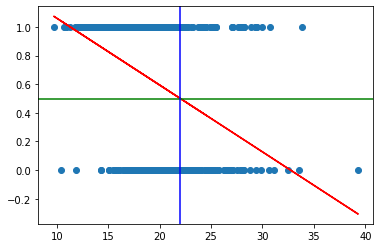

In [10]:
X = np.c_[np.ones(len(cancer.data)), cancer.data[:,1]]
# X = cancer.data[:,1]
Y = cancer.target
Theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

plt.scatter(X[:,1], Y)
plt.plot(X[:,1], X.dot(Theta), "r-")
plt.axhline(0.5, color="g") # Y는 0.5 (절대선 그리기)

# y = ax + b   (y-b)/a = x
plt.axvline((0.5-Theta[0])/Theta[1], color="b")  # X는 20 인 절대선 그리기
plt.show()

# **Rogistic Regression**
## **1 회귀식 모델 테스트 데이터 만들기**

In [11]:
data = np.array(np.arange(0, 5, 0.1))
data

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [12]:
y = np.exp(data)
y

array([  1.        ,   1.10517092,   1.22140276,   1.34985881,
         1.4918247 ,   1.64872127,   1.8221188 ,   2.01375271,
         2.22554093,   2.45960311,   2.71828183,   3.00416602,
         3.32011692,   3.66929667,   4.05519997,   4.48168907,
         4.95303242,   5.47394739,   6.04964746,   6.68589444,
         7.3890561 ,   8.16616991,   9.0250135 ,   9.97418245,
        11.02317638,  12.18249396,  13.46373804,  14.87973172,
        16.44464677,  18.17414537,  20.08553692,  22.19795128,
        24.5325302 ,  27.11263892,  29.96410005,  33.11545196,
        36.59823444,  40.44730436,  44.70118449,  49.40244911,
        54.59815003,  60.3402876 ,  66.68633104,  73.6997937 ,
        81.45086866,  90.0171313 ,  99.48431564, 109.94717245,
       121.51041752, 134.28977968])

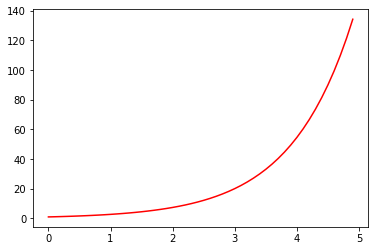

In [13]:
plt.plot(data, y, 'r-')
plt.show()

## **2 Gradient Descent**
미분을 활용하여 점진적으로 맞춰가는 과정을 실습**
1. **e 자연로그상수** 의 특징 : e 를 미분한 결과값도 e (동일하다)
1. Factorial 계산시 0! 은 1이 된다
1. 다차원 데이터의 Theta ^ 을 찾기 위해 **최소값을 찾는 Gradient Descet, 최대값을 찾는 Gradient Accent** 가 있습니다.
1. 최적의 값을 구하기 어렵고 **근사치를 계산시 활용** 하는 공식으로 **Taylor Series(테일러 급수)** 를 활용 합니다

In [14]:
from math import exp, factorial

# 테일러 급수의 구현
def taylor(x):
    a = 0
    n = 6  # 근사치 구현시 차원의 수
    _sum = 0.0
    for i in range(n):
        _sum += (exp(a)/ factorial(i)) * (x-a)**i # 0! 는 1이다!!
    return _sum

_y =  np.array(list(map(taylor, data)))
_y

array([ 1.        ,  1.10517092,  1.22140267,  1.34985775,  1.49181867,
        1.64869792,  1.822048  ,  2.01357142,  2.22513067,  2.45875825,
        2.71666667,  3.00125842,  3.315136  ,  3.66111192,  4.04221867,
        4.46171875,  4.92311467,  5.43015892,  5.986864  ,  6.59751242,
        7.26666667,  7.99917925,  8.80020267,  9.67519942, 10.629952  ,
       11.67057292, 12.80351467, 14.03557975, 15.37393067, 16.82609992,
       18.4       , 20.10393342, 21.94660267, 23.93712025, 26.08501867,
       28.40026042, 30.893248  , 33.57483392, 36.45633067, 39.54952075,
       42.86666667, 46.42052092, 50.224336  , 54.29187442, 58.63741867,
       63.27578125, 68.22231467, 73.49292142, 79.104064  , 85.07277492])

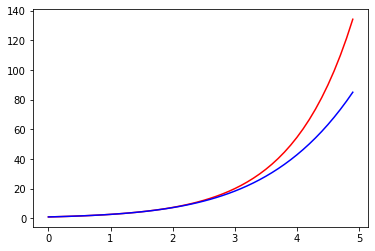

In [15]:
# n 차원의 값이 클수록 휘어지는 세기가 높아진다
plt.plot(data, y, 'r-')
plt.plot(data, _y, 'b-')
plt.show()

## **3 Logistic Regression**
단어들이 묶여있을 때, 이를 구분하는 띄어쓰기 학습 용도로 사용할 수 있습니다.

In [16]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
X = cancer.data[:, 1]
X = np.c_[np.ones(X.size), X]
Y = cancer.target
Theta = np.random.rand(2)

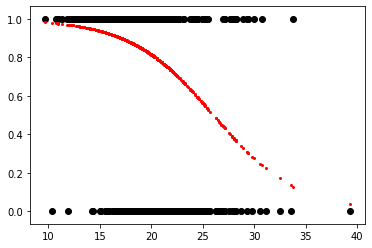

CPU times: user 4.53 s, sys: 161 ms, total: 4.69 s
Wall time: 4.48 s


In [17]:
%%time
logistic1 = lambda x:1 / (1+np.e**-x)
logistic2 = lambda x:np.e**x/(1+np.e**-x)
gradient  = lambda x,y:x.dot(y-logistic1(x.dot(Theta)))

h         = 0.001
for _ in range(1000):
    for Xi, Yi in zip(X,Y):
        Theta += h*gradient(Xi, Yi)

plt.scatter(X[:,1], Y, color="k")
plt.plot(X[:,1], logistic1(X.dot(Theta)), 'ro', markersize=2)
plt.show()

## **3 Rosenbrock function**
다차원 공간의 경우 이를 시각화 및 최적의 점을 찾을 수 있다

In [18]:
# 로젠브룩 함수의 구현
import numpy as np
def rosenbrock(x1, x2):
    return (1-x1)**2 + 100*(x2-x1**2)**2

X1 = np.arange(-2, 2, 0.1)
X2 = np.arange(-2, 2, 0.1)
X1, X2 = np.meshgrid(X1, X2)
Y = np.array(list(map(rosenbrock, X1, X2)))
Y.shape

(40, 40)

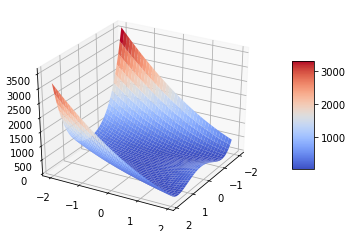

In [19]:
%matplotlib inline

# 3차원 그래프의 시각화
import matplotlib.pyplot as plt
from matplotlib import cm

# ValueError: Unknown projection '3d'  오류방지
from mpl_toolkits.mplot3d import Axes3D

fig  = plt.figure()
ax   = fig.gca(projection="3d")
surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm, linewidth=0, antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(30, 30)
plt.show()

## **4 Rosenbrock function 2**
다차원 공간의 경우 이를 시각화 및 최적의 점을 찾을 수 있다

In [20]:
h   = 0.0001
_X1, _X2, _Y = [], [], []

_X1.append(-1.3)
_X2.append(0.9)
_Y.append(rosenbrock(_X1[-1], _X2[-1]))
_Y

[67.70000000000002]

In [21]:
# 로젠브룩 추가 함수
def rosenbrock_x1(x1, x2):
    return -2*(1-x1) - 400*x1*(x2-x1**2)

def rosenbrock_x2(x1, x2):
    return 200*(x2-x1**2)

for _ in range(30000):
    Xt = (rosenbrock_x1(_X1[-1], _X2[-1]), 
          rosenbrock_x2(_X1[-1], _X2[-1]))
    _X1.append(_X1[-1] - h*(Xt[0] / abs(Xt[0])))
    _X2.append(_X2[-1] - h*(Xt[1] / abs(Xt[1])))
    _Y.append(rosenbrock(_X1[-1], _X2[-1]))
    
X1 = np.arange(-2, 2, 0.1)
X2 = np.arange(-2, 2, 0.1)
X1, X2 = np.meshgrid(X1, X2)
Y = np.array(list(map(rosenbrock, X1, X2)))

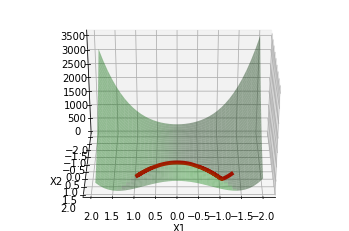

In [22]:
# surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm, linewidth=0, antialiased=True)
fig = plt.figure()
ax = fig.gca(projection="3d")

ax.plot_surface(X1, X2, Y, color="g", alpha=.4, linewidth=0, antialiased=True)
ax.plot(_X1, _X2, _Y, color='r', linewidth=4.0)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.view_init(30, 90)
plt.show()